### Chapter 13: The Road to Succession : Transition Matrices
#### via the Handbook of Quantiative Ecology by Justin Kitzes
----------------------------------------------------------------------

A group of citizen scientists has recently surveyed a small patch of 100 trees in a local park. The survey found **1 beech, 20 maples, and 79 trees of other species** in the patch. Under each adult tree, the group counted the number of saplings of each species. The proportions of sapling species found under each species of adult tree are shown in the table. If we assume that each adult tree will be replaced randomly by one of the saplings under it, how will the forest composition change, if at all, in the future?

This problem poses a question about succession, the process by which a community changes predictably over time following an initial disturbance. In a temperate forest like this one, the relative proportions of different tree species are often seen to change gradually over time, eventually reaching a state with a more or less stable balance of various species. To predict what this stable balance might eventually look like, we’ll use a variant of the matrix models that we introduced in chapter 12. The most important difference between this problem and the one in chapter 12 is that here **we will assume that the total number of adult trees remains constant at 100 individuals for all times t.** Only the relative proportions of trees of each species change over time.

We’ll begin by using the information in the table to set up a system of three difference equations that describes how the number of trees of each of the three species changes during a single cycle of adult tree replacement. Of course, in reality, not every tree in the forest dies and gets replaced by a sapling simultaneously, but it turns out that the relative proportion of individuals of each species in the eventual stable state is not affected by this assumption.

If we use the variables B, M, and O to represent beeches, maples, and other species, respectively, we can write the three difference equations describing the change in the number of trees of each species as

    Bt+1 = 0.8Bt + 0.25Mt + 0.1Ot
    Mt+1 = 0.1Bt + 0.15Mt + 0.25Ot
    Ot+1 = 0.1Bt + 0.6Mt + 0.65Ot

The first of these three equations, for example, states that the number of beech trees in the forest in the next generation is equal to 80% of the beech trees in the current generation, plus 25% of the maple trees in the current generation, plus 10% of the other species of trees in the current generation. These numbers are simply the percentages of beech saplings under the adult trees of each of those three species. If each adult is replaced by a randomly chosen sapling under it, then these sapling percentages will equal the percentages of adult trees that transition from each species to beech.
                    
------------------------ Adult Tree Species -------------------------------
| Sapling species | Beech | Maple | Other |
|-----------------|-------|-------|-------|
| **Beech**       | 0.8   | 0.25  | 0.1   |
| **Maple**       | 0.1   | 0.15  | 0.25  |
| **Other**       | 0.1   | 0.6   | 0.65  |

Matrix A : transition matrix : describes the transitions for a fixed number of adult trees between species groups

Matrix: 
| Sapling species | Beech | Maple | Other |
|-----------------|-------|-------|-------|
| **Beech**       | 0.8   | 0.25  | 0.1   |
| **Maple**       | 0.1   | 0.15  | 0.25  |
| **Other**       | 0.1   | 0.6   | 0.65  |

Vector n0 : number of adult trees at present
| Adult Tree species | Number|
|-----------------   |-------|
| **Beech**          | 1     | 
| **Maple**          | 20    | 
| **Other**          | 79    |

Multiply vector n0 by transition matrix A to project the number of trees in the patch at time t = 1 (one generation later) = vector n1
| Adult Tree species | Number|
|-----------------   |-------|
| **Beech**          | 13.7  | 
| **Maple**          | 22.85 | 
| **Other**          | 63.45 |

In [23]:
# Import numpy
import numpy as np
import matplotlib.pyplot as plt

def forest_succession(transition_matrix, initial_pop, n_generations):
    """
    Simulates forest succession over time using matrix multiplication.

    Parameters
    ----------
    transition_matrix : 2D numpy array (square)
        The transition probabilities (each column should sum to 1).
        Rows = sapling species; Columns = adult species.

    initial_pop : 1D numpy array
        Initial population (or proportions) of each species.

    n_generations : int
        Number of replacement cycles (time steps) to simulate.

    Returns
    -------
    pops : 2D numpy array
        Population (or proportion) of each species at each time step.
        Rows = time steps, Columns = species.
    """
    # Make sure inputs are numpy arrays
    A = np.array(transition_matrix)
    x = np.array(initial_pop, dtype=float)
    
    # Normalize initial population (just in case)
    x = x / np.sum(x)

    # Store results
    pops = [x]

    # Iteratively apply the matrix for each generation
    for _ in range(n_generations):
        x = A @ x   # Matrix multiplication
        x = x / np.sum(x)  # Keep proportions normalized
        pops.append(x)
    
    return np.array(pops)


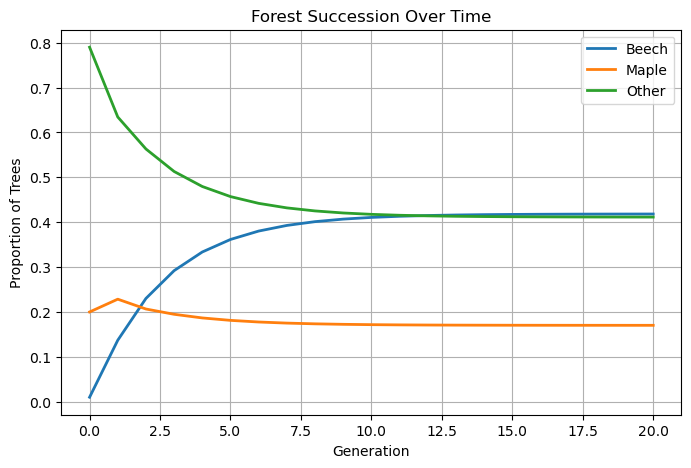

Final proportions after 20 generations:
[0.418 0.17  0.411]


In [24]:
# initialize the transition matrix A
A = np.array([
    [0.8, 0.25, 0.1],
    [0.1, 0.15, 0.25],
    [0.1, 0.6, 0.65]
])
# initialize the population vector with the initial populations
initial_pop = np.array([1, 20, 79])  # 1 Beech, 20 Maple, 79 Other

# Simulate for 20 generations
results = forest_succession(A, initial_pop, 20)

# Plot results
generations = np.arange(len(results))
plt.figure(figsize=(8, 5))
plt.plot(generations, results[:, 0], label="Beech", linewidth=2)
plt.plot(generations, results[:, 1], label="Maple", linewidth=2)
plt.plot(generations, results[:, 2], label="Other", linewidth=2)
plt.xlabel("Generation")
plt.ylabel("Proportion of Trees")
plt.title("Forest Succession Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Print final proportions
print("Final proportions after 20 generations:")
print(np.round(results[-1], 3))


1. What is the stationary state distribution of this population?
    - Pr(S = B) = 0.42
    - Pr(S = M) = 0.17
    - Pr(S = O) = 0.41

In [25]:
# Transition matrix (from Table 13.1)
A = np.array([
    [0.8, 0.25, 0.1],
    [0.1, 0.15, 0.25],
    [0.1, 0.6, 0.65]
])

# Initial forest composition (Beech, Maple, Other)
x0 = np.array([0.01, 0.20, 0.79])

# -----------------------------------------
# Repeated multiplication (simulate 50 years)
# -----------------------------------------
x = x0.copy()
for t in range(50):
    x = A @ x         # Multiply by transition matrix
    x = x / np.sum(x) # Normalize (keep proportions summing to 1)

print("After 50 years (approx. stationary):")
print(np.round(x, 3))

After 50 years (approx. stationary):
[0.418 0.17  0.411]


2. What is the probability that a randomly selected individual from this population at year 50 is a Maple?
    - Probability of maple at year 50 is 0.17 so that is about 17%

-----------------------------------------------------------------------------------------------------------------

### Chapter 14: A Pair of Populations : Absorption
#### via the Handbook of Quantiative Ecology by Justin Kitzes
----------------------------------------------------------------------------------------------------------------
The park we visited in chapter 13 is one of two remaining semi-natural habitat patches in its region. These two patches are inhabited by a threatened butterfly species. It has been observed that the species occasionally goes locally extinct in one patch, but the patch is then recolonized by butterflies from the other patch. For this particular species, the probability of local extinction in a given year appears to be around **13% in the smaller patch and 3% in the larger patch, and the probability of either empty patch being recolonized by butterflies from the other occupied patch in a given year is about 2%.** Assuming that both patches are currently occupied, what is the probability that the threatened butterfly species will be permanently lost from both patches sometime in the next 50 years?

This problem is the first of several that we will encounter in this book that involve estimating the risk of extinction for a species. In this particular problem, our goal is to determine the probability that the butterfly species will be lost from both patches—in which case it presumably has no way of returning to this landscape—before a certain number of years have passed. Since the butterfly can potentially inhabit two different patches in this landscape, the butterfly will be lost entirely only if it becomes locally extinct in both patches simultaneously. This could occur either if both patches become empty simultaneously in the same year, or if one patch becomes empty and is not “rescued” by a colonist from the other patch before that patch also becomes empty. A population like this one that is spread across multiple patches in which there is a possibility of local extinction and recolonization is known as a metapopulation.

To begin, we can recognize that each of the two patches, which we will call A and B, can be found in two possible states, occupied or empty. There are thus four possible states in which we might find the metapopulation: both patches empty, A occupied and B empty, A empty and B occupied, and both patches occupied. For convenience, we’ll label these four states as 0/0, 1/0, 0/1, and 1/1. In these labels, the first number indicates the state of patch A and the second the state of patch B, and a 1 indicates an occupied patch and a 0 indicates an empty patch. The entire metapopulation becomes extinct if it enters state 0/0. In the language of matrix models, a state that cannot be left once a system enters it is known as an absorbing state. Our goal in this problem is thus to estimate the probability that the metapopulation enters this single absorbing state 0/0 at any time before 50 years have passed.

We’ll solve this problem using a matrix model similar to those that we have already encountered. Because we are interested in determining how a probability changes over time, in this case, the probability that the metapopulation is in any of the four possible states, we’ll begin by building a transition matrix. Each row and column of the transition matrix A, from top to bottom or from left to right, will correspond to the states 0/0, 1/0, 0/1, and 1/1, in that order. To make this easier to visualize, we’ll use a table to work out the numbers that we need to enter in this transition matrix.

|                   | **In 0/0 at t** | **In 1/0 at t**         | **In 0/1 at t**         | **In 1/1 at t**         |                                                           
| ----------------  | ----------------|-------------------------|-------------------------|------------------------ |
| **In 0/0 at t+1** |        1        | eA(1-cB) = 0.029        | (1 − cA)eB = 0.13       | eAeB = 0.0039           |
| **In 1/0 at t+1** |        0        | (1 − eA)(1 − cB) = 0.95 | cAeB = 0.0026           | (1 − eA)eB = 0.13       |
| **In 0/1 at t+1** |        0        | eAcB = 0.00060          | (1 − cA)(1 − eB) = 0.85 | eA(1 − eB) = 0.026      |
| **In 1/1 at t+1** |        0        | (1 − eA)cB = 0.019      | cA(1 − eB) = 0.017      | (1 − eA)(1 − eB) = 0.84 |


    A = larger patch
    B = smaller patch
    eA = probability the butterflies go locally extinct in patch A each year = 0.03
    eB = probability the butterflies go locally extinct in patch B each year = 0.13
    cA = cB = probabilities that each patch is colonized by immigrants from the other patch each year = 0.02

a patch can become empty only if it is currently occupied, and that a patch can be colonized only if it is currently empty and the other patch is currently occupied

0/0 at time t = butterfly extinct in both patches 
state 1/1 = both patches occupied 

| State at t+1 ↓ \ State at t → | 0/0 | 1/0 | 0/1 | 1/1 |
|:------------------------------:|:----:|:----:|:----:|:----:|
| **0/0** | 1.0000 | 0.1274 | 0.0294 | 0.0039 |
| **1/0** | 0.0000 | 0.8526 | 0.0006 | 0.0261 |
| **0/1** | 0.0000 | 0.0026 | 0.9506 | 0.1261 |
| **1/1** | 0.0000 | 0.0174 | 0.0194 | 0.8440 |

 * Each column sums to 1 → total probability of leaving a state.
 * 0/0 (both empty) is an absorbing state — once there, it can’t be left.
 * The system starts in state 1/1 (both patches occupied).
 * The entry in the top-left corner (1.0000) keeps extinction permanent.


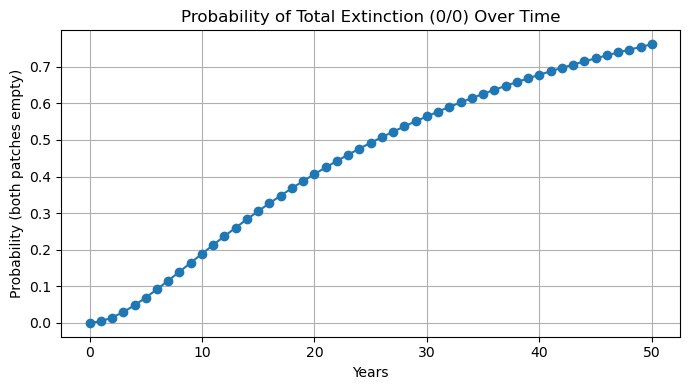

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# --- Transition matrix (from the table) ---
A = np.array([
    [1.0000, 0.1274, 0.0294, 0.0039],
    [0.0000, 0.8526, 0.0006, 0.0261],
    [0.0000, 0.0026, 0.9506, 0.1261],
    [0.0000, 0.0174, 0.0194, 0.8440]
])

# --- Initial state vector (start with both patches occupied) ---
# Order of states: [0/0, 1/0, 0/1, 1/1]
P0 = np.array([0, 0, 0, 1])

# --- Simulate over 50 years ---
years = 50
P = P0.copy()
extinction_probs = [P[0]]  # track probability of total extinction (state 0/0)

for t in range(1, years + 1):
    P = A @ P
    extinction_probs.append(P[0])

# --- Plot results ---
plt.figure(figsize=(7, 4))
plt.plot(range(years + 1), extinction_probs, marker='o')
plt.title("Probability of Total Extinction (0/0) Over Time")
plt.xlabel("Years")
plt.ylabel("Probability (both patches empty)")
plt.grid(True)
plt.tight_layout()
plt.show()
